In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
file_path = r"/content/CBOW.txt"

In [5]:
with open(file_path,'r') as file:
  file_contents = file.read()

file_contents

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. \n\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. \n\nThe reproductive number – the number of secondary infections generated from one infected individual – is understood to be betwe

In [7]:
sentences = file_contents.split('.')
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

In [9]:
window_size = 3
tokenized_sentences = tokenizer.texts_to_sequences(sentences)

In [10]:
data,labels = [],[]
for sentence in tokenized_sentences:
  for i,target_word in enumerate(sentence):
    context = [
        sentence[j] for j in range(i - window_size,i + window_size + 1)
        if j!=i and 0 <= j < len(sentence)
    ]
    data.append(context)
    labels.append(target_word)

In [13]:
data = pad_sequences(data)
labels = np.array(labels)

In [15]:
model = models.Sequential([
    layers.Embedding(input_dim=total_words,output_dim=50,input_length=window_size*2),
    layers.GlobalAveragePooling1D(),
    layers.Dense(total_words,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 50)             5150      
                                                                 
 global_average_pooling1d (  (None, 50)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 103)               5253      
                                                                 
Total params: 10403 (40.64 KB)
Trainable params: 10403 (40.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
h = model.fit(data,labels,epochs=200,verbose=1)

Epoch 1/200
7/7 [==============================] - 0s 5ms/step - loss: 4.5405 - accuracy: 0.1515
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 4.5276 - accuracy: 0.1515
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 4.5135 - accuracy: 0.1566
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 4.4983 - accuracy: 0.1566
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 4.4820 - accuracy: 0.1566
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 4.4645 - accuracy: 0.1566
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 4.4455 - accuracy: 0.1465
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 4.4261 - accuracy: 0.1465
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 4.4052 - accuracy: 0.1465
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 4.3833 - accuracy: 0.1414
Epoch 11/200
7/7 [===========

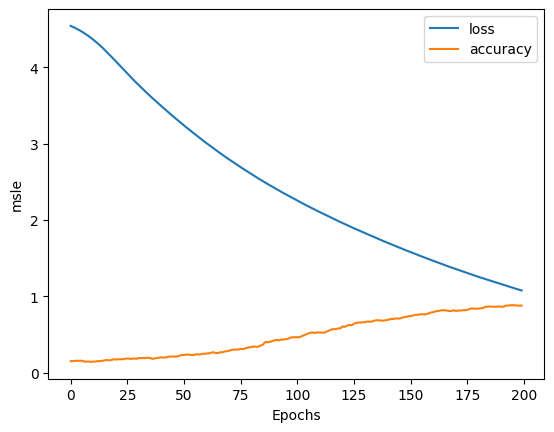

In [23]:
plt.plot(h.history['loss'])
plt.plot(h.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.xlabel('Epochs')
plt.ylabel('msle')
plt.show()

In [27]:
word_embeddings = model.layers[0].get_weights()[0]
target_word = 'influenza'
target_embedding = word_embeddings[tokenizer.word_index[target_word]]


In [35]:
similarities = cosine_similarity(target_embedding.reshape(1,-1),word_embeddings)[0]
most_similar_indices = similarities.argsort()[-5:][::-1]
most_similar_words = [word for word, idx in tokenizer.word_index.items() if idx in most_similar_indices]

print(f'Most similar words to {target_word}: {most_similar_words}')

Most similar words to influenza: ['influenza', 'faster', 'contrast', 'learning', 'context']


In [46]:
input_text = "The quick brown fox jumps over the lazy dog."
input_sequence = tokenizer.texts_to_sequences([input_text])[0]
target_index = 3
context_sequence = input_sequence[target_index-window_size : target_index+window_size+1]
input_data = pad_sequences([context_sequence],maxlen=window_size*2)
pred = model.predict(input_data)
predicted_word_index = np.argmax(pred)
predicted_word = tokenizer.index_word[predicted_word_index]
print(f'Predicted word: {predicted_word}')

1/1 [==============================] - 0s 22ms/step
Predicted word: in
